# Made by : Thangjam Denim Singh

### Main Code

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Importing the dataset

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

#### Seperating the features and the result

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#### Plotting the raw data

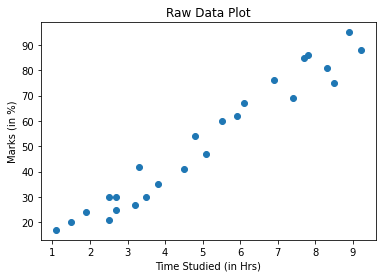

In [5]:
plt.scatter(X, y)
plt.title('Raw Data Plot')
plt.xlabel('Time Studied (in Hrs)')
plt.ylabel('Marks (in %)')
plt.show()

#### Creating the tran and test datas

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


#### Training the model

In [7]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

print(f'Coefficient : {LR.coef_}\nIntercept : {LR.intercept_}\nAccuracy : {round(LR.score(X_test, y_test),4)*100}%')

Coefficient : [9.91065648]
Intercept : 2.018160041434662
Accuracy : 94.55%


#### The predicted values

In [8]:
pred = LR.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted' : pred})
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Plotting the LR line with respect to the test data

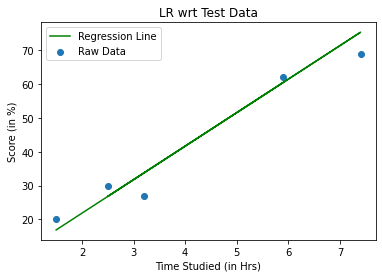

In [9]:
plt.plot(X_test, pred, 'g', label='Regression Line')
plt.scatter(X_test, y_test, label='Raw Data')
plt.title('LR wrt Test Data')
plt.xlabel('Time Studied (in Hrs)')
plt.ylabel('Score (in %)')
plt.legend()
plt.show()

#### Plotting the LR line with respect to the whole dataset

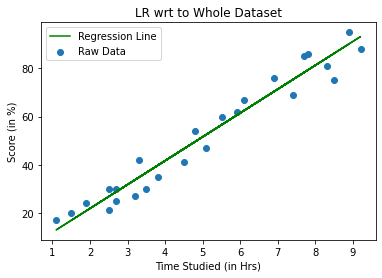

In [10]:
line = (LR.coef_ * X) + LR.intercept_
plt.scatter(X, y, label='Raw Data')
plt.plot(X, line, 'g', label='Regression Line')
plt.title('LR wrt to Whole Dataset')
plt.xlabel('Time Studied (in Hrs)')
plt.ylabel('Score (in %)')
plt.legend()
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [11]:
h = float(input('Hours : ')) # According to the question, i/p should be 9.25
h = np.reshape(h,(-1,1))
pred_q = LR.predict(h)
print(f'Predicted Score : {round(pred_q[0],2)}%')

Hours : 9.25
Predicted Score : 93.69%


### Evaluating the model

In [12]:
from sklearn import metrics
print(f'Mean Absolute Error : {metrics.mean_absolute_error(y_test, pred)}')

Mean Absolute Error : 4.183859899002982
